In [20]:
from skimage import io, color, filters
from skimage.transform import resize, rotate
import numpy as np
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [22]:
from skimage.filters import sobel 
from skimage.feature._canny import canny
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle

In [23]:
import matplotlib.ticker as mtick

In [24]:
from skimage.color import rgb2gray

In [25]:
import pandas as pd

In [26]:
plt.style.use('ggplot')

In [27]:
progress = pd.read_csv('progress_monitor.csv', delimiter = ',')

In [28]:
progress['label'] = 'Chkpt' + ' #' + progress['model_chkpt'].astype(str)

In [29]:
progress


,model_chkpt,trainable_blocks,num_chords,epochs,accuracy,recall,precision,optimizer,other comments,label
0,1,0,3,10.0,43.7,47.3,48.3,sgd(lr = 0.2),NaN,Chkpt #1
1,2,1,3,5.0,52.1,56.2,58.2,"SGD(lr=0.01, momentum = 0.9, decay = 0.001)",NaN,Chkpt #2
2,3,2,3,8.0,85.4,86.9,85.9,"SGD(lr=0.01, momentum = 0.9, decay = 0.001",NaN,Chkpt #3
3,4,3,3,5.0,84.4,87.0,85.3,"SGD(lr=0.001, momentum = 0.9, decay = 0.001",NaN,Chkpt #4
4,5,4,3,8.0,87.5,90.0,88.7,"\nAdam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999)\n",switched optimizer to Adam because plateuing,Chkpt #5
5,6,4,3,20.0,93.4,95.2,94.2,"\nAdam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999)\n","added in some additional images, retrained",Chkpt #6
6,7,5,3,NaN,96.9,96.8,97.3,"\nAdam(lr=0.0001, beta_1 = 0.9, beta_2 = 0.999)\n",NaN,Chkpt #7
7,8,0,5,NaN,82.8,83.0,83.2,SGD(lr = 0.2),NaN,Chkpt #8
8,9,1,5,NaN,95.8,95.8,97.2,"\nAdam(lr=0.001, beta_1 = 0.9, beta_2 = 0.999)\n",NaN,Chkpt #9
9,10,2,5,NaN,95.8,96.3,95.7,"\nAdam(lr=0.0001, beta_1 = 0.9, beta_2 = 0.999)\n",NaN,Chkpt #10


In [30]:
progress['num_chords']= pd.Categorical(progress['num_chords'])

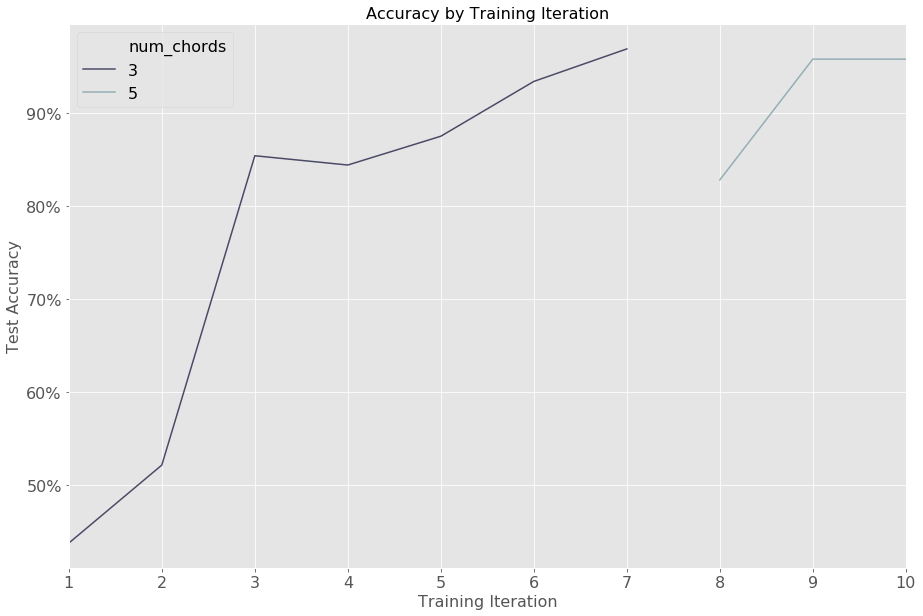

In [32]:
fig, ax = plt.subplots(figsize= (15,10))
ax.set_title('Accuracy by Training Iteration', fontsize = 16)
sns.lineplot(progress['model_chkpt'], progress['accuracy'], hue = progress['num_chords'], ax = ax,  palette="bone")
# ax.plot(progress['label'], progress['accuracy'], color = list(c))
ax.set_xticks(np.arange(1,13))
ax.set_xlabel('Training Iteration', fontsize = 16)
ax.set_ylabel('Test Accuracy', fontsize = 16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlim(1, 10)
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.legend(fontsize = 16)
fig.savefig('../images/model_progress.jpeg');

In [15]:
r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern,


NameError: name 'r' is not defined

### IMAGE EXPLORATION BELOW


In [7]:
!ls

exploration.ipynb    progress_monitor.csv


In [7]:
!ls data/train/C

20200905_134202.jpg IMG_0743.JPG        IMG_0882.JPG        IMG_1058.JPG
20200905_134210.jpg IMG_0744.JPG        IMG_0883.JPG        IMG_1059.JPG
20200905_134213.jpg IMG_0745.JPG        IMG_0884.JPG        IMG_1061.JPG
20200905_134217.jpg IMG_0746.JPG        IMG_0886.JPG        IMG_1100.JPG
20200905_134235.jpg IMG_0747.JPG        IMG_0887.JPG        IMG_1102.JPG
20200905_134237.jpg IMG_0748.JPG        IMG_0888.JPG        IMG_1103.JPG
20200905_134240.jpg IMG_0749.JPG        IMG_0889.JPG        IMG_1105.JPG
20200905_134244.jpg IMG_0750.JPG        IMG_0890.JPG        IMG_1106.JPG
20200905_134247.jpg IMG_0751.JPG        IMG_0891.JPG        IMG_1108.JPG
20200905_134424.jpg IMG_0753.JPG        IMG_0892.JPG        IMG_1109.JPG
20200905_134427.jpg IMG_0756.JPG        IMG_0893.JPG        IMG_1110.JPG
20200905_134431.jpg IMG_0757.JPG        IMG_0894.JPG        IMG_1112.JPG
20200905_134444.jpg IMG_0758.JPG        IMG_0895.JPG        IMG_1113.JPG
20200905_134449.jpg IMG_0759.JPG        IMG_0897.JP

In [6]:
x = io.imread('../data/train/C/IMG_0734.JPG')

FileNotFoundError: No such file: '/Users/jamiewessels/Galvanize/capstones/aCHORDing-to-the-Image/data/train/C/IMG_0734.JPG'

In [12]:
x.shape

(2448, 3264, 3)

In [21]:
x = x/255

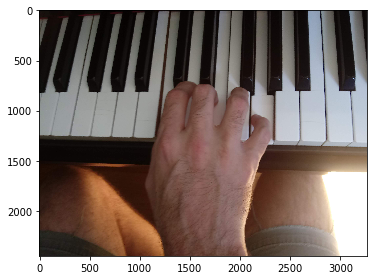

In [22]:
io.imshow(x)

In [23]:
type(x)

numpy.ndarray

In [24]:
red = x[:,:,0]
green = x[:,:,1]
blue = x[:,:,2]

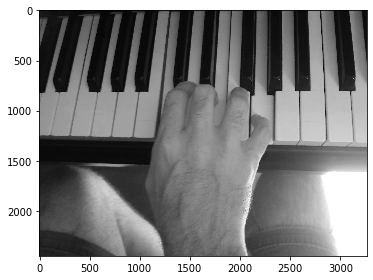

In [25]:
io.imshow(red)

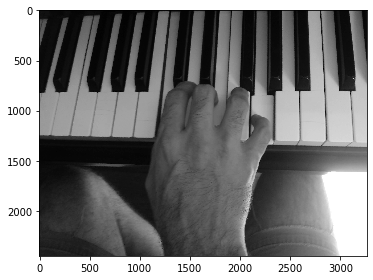

In [26]:
io.imshow(green)

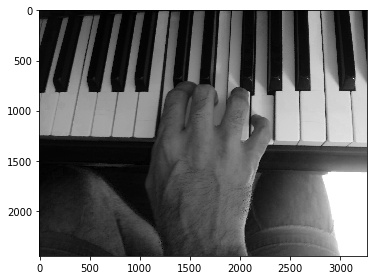

In [27]:
io.imshow(blue)

In [28]:
x_gray = rgb2gray(x)

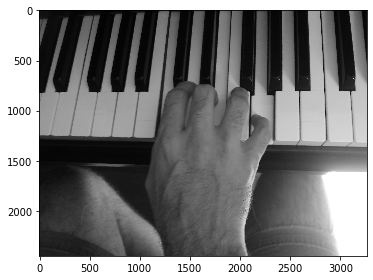

In [29]:
io.imshow(x_gray)

### Gray scale seems appropriate - colors don't add much information

look at edges


Text(0.5, 1.0, 'Sample image histogram')

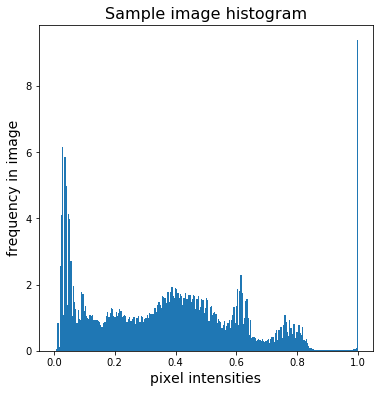

In [33]:
x_gray_values = np.ravel(x_gray)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.hist(x_gray_values, bins=256, density = True)
ax.set_xlabel('pixel intensities', fontsize=14)
ax.set_ylabel('frequency in image', fontsize=14)
ax.set_title("Sample image histogram", fontsize=16)
# ax.set_ylim([0, 100000]);

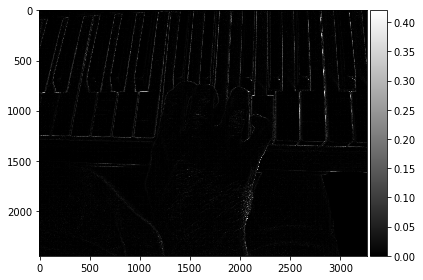

In [36]:
sobel_img = filters.sobel(x_gray)
io.imshow(sobel_img, cmap = 'gray');

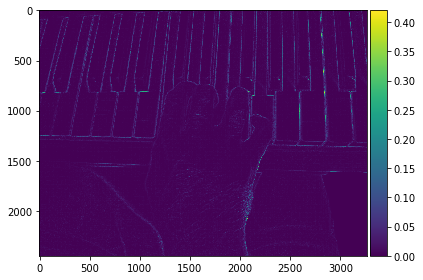

In [63]:
io.imshow(sobel_img)

In [37]:
from skimage.filters import gaussian

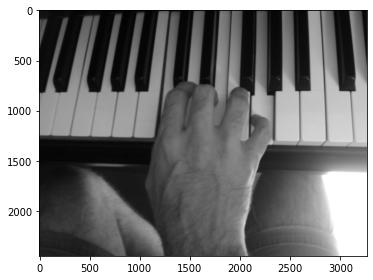

In [43]:
g_img = gaussian(x_gray, sigma = 5)
io.imshow(g_img)


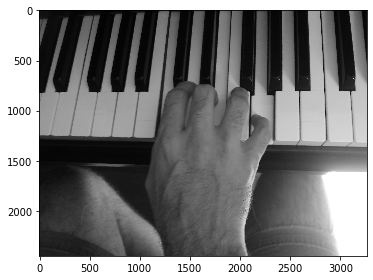

In [42]:
io.imshow(x_gray)

In [ ]:
#Canny edge detection

In [48]:
edges1 = canny(x_gray)
edges2 = canny(x_gray, sigma=3)

In [77]:
edges3 = canny(x_gray, low_threshold = 0.1, high_threshold = 1)

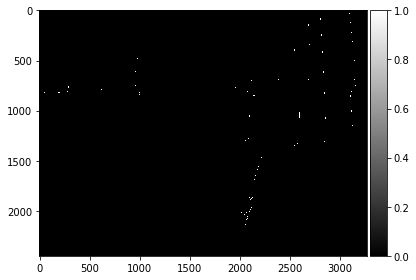

In [78]:
io.imshow(edges3, cmap = 'gray')

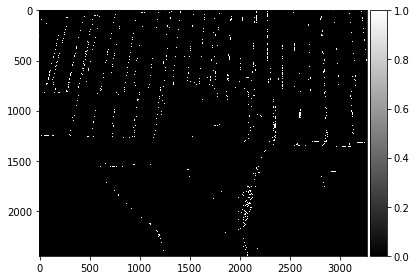

In [50]:
io.imshow(edges1, cmap = 'gray')

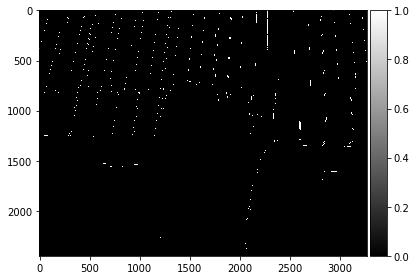

In [51]:
io.imshow(edges2, cmap = 'gray')

In [ ]:
#roberts edge detection

In [52]:
edge_roberts = filters.roberts(x_gray)

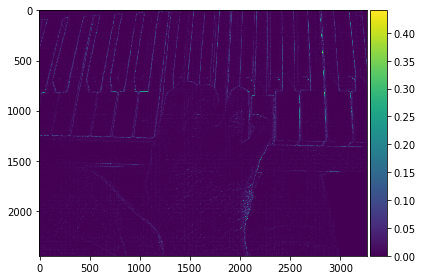

In [54]:
io.imshow(edge_roberts)

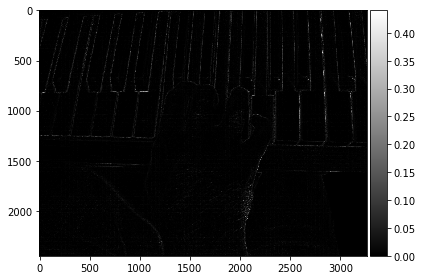

In [59]:
io.imshow(edge_roberts, cmap = 'gray')

In [ ]:
#prewitt edge detection

In [60]:
edge_prewitt = filters.prewitt(x_gray)

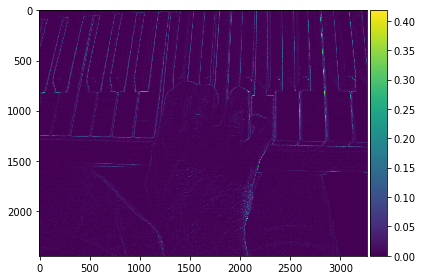

In [61]:
io.imshow(edge_prewitt)

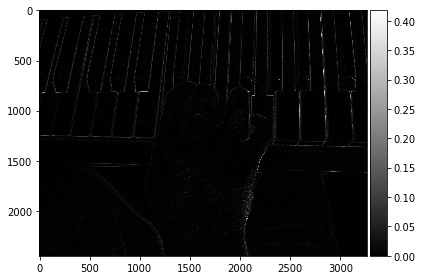

In [62]:
io.imshow(edge_prewitt, cmap = 'gray')

In [64]:
#scharr edge

In [65]:
edge_scharr = filters.scharr(x_gray)

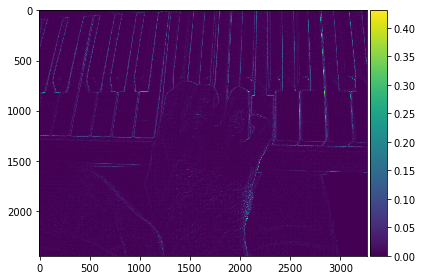

In [66]:
io.imshow(edge_scharr)

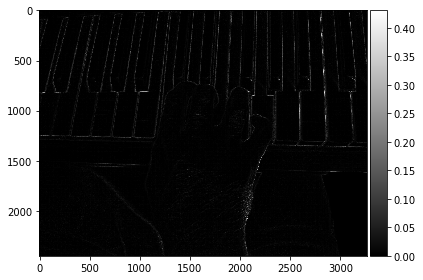

In [67]:
io.imshow(edge_scharr, cmap = 'gray')

In [68]:
#Compare edge detection! 

In [75]:
norm_sobel = sobel_img/np.max(sobel_img)